In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# rugplot
- 데이터 위치를 x축 위에 작은 선분

# distplot
- Matplotlib의 hist 명령과 유사
- rug와 커널 밀도 표시(kde)기능이 있어서 Matplotlib의 hist명령보다 많이 사용된다.

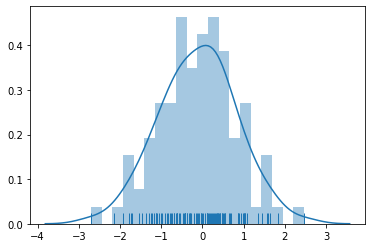

In [4]:
import warnings
warnings.filterwarnings("ignore") # warning 메시지를 숨기거나 무시

x = np.random.normal(size=100)
sns.distplot(x, bins=20, kde=True, rug=True)

- {hist, kde, rug, fit}_kws:dictionaries,optional
    - Keyword arguments for underlying plotting functions.

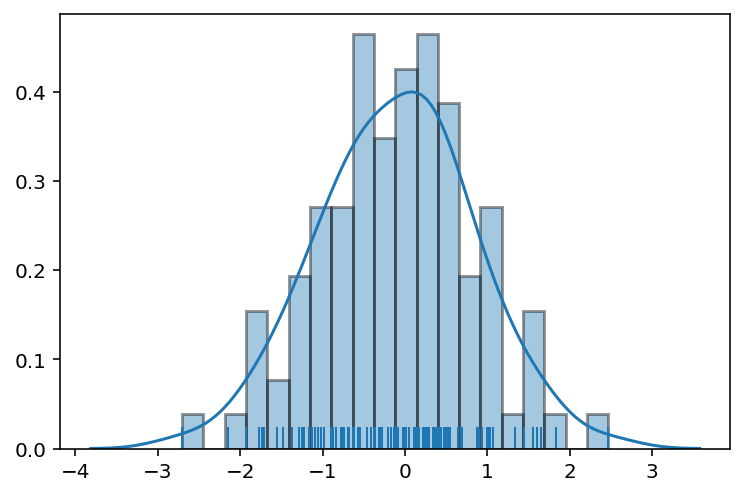

In [7]:
sns.distplot(x, bins=20, kde=True, rug=True, hist_kws=dict(edgecolor='k', linewidth=1.5))

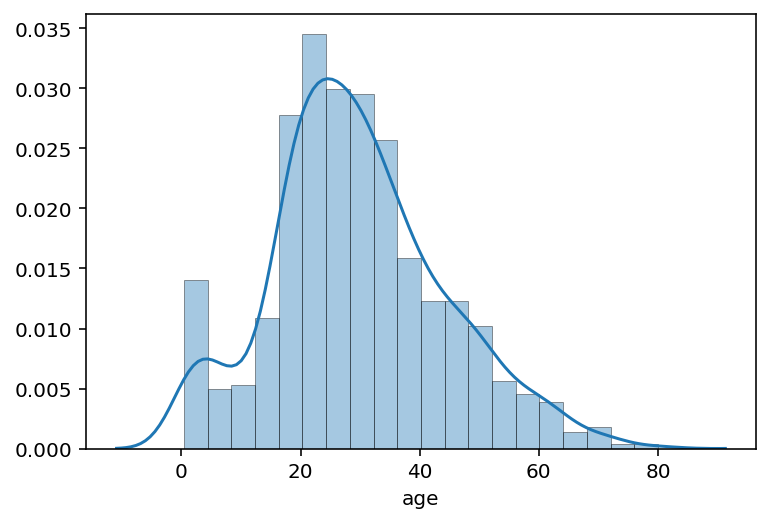

In [8]:
titanic = sns.load_dataset("titanic")

sns.distplot(titanic.age.dropna(), hist_kws=dict(edgecolor='k', linewidth=0.5)) # dropna() : 나이가 없는 항목은 지운다.

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- x축의 시작 값을 0으로 설정 할 수 있다.(임의의 범위로 설정)

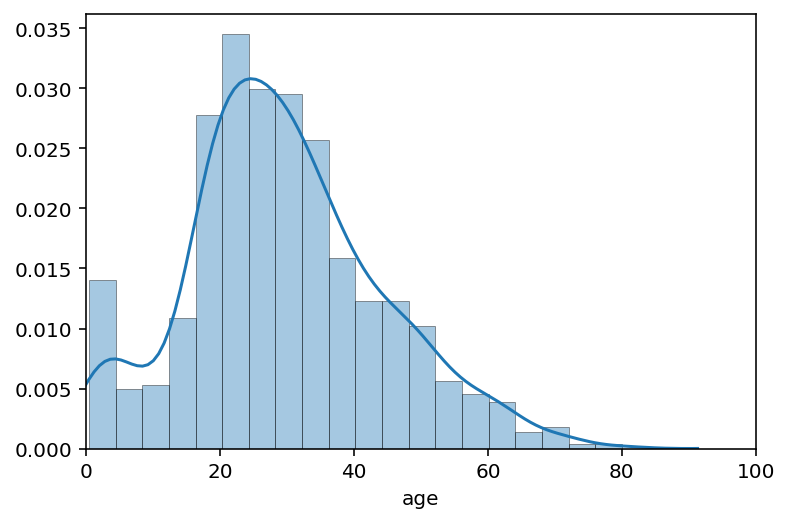

In [10]:
plt.xlim([0,100])
sns.distplot(titanic.age.dropna(), hist_kws=dict(edgecolor='k', linewidth=0.5))

## np.ployfit(x, y, deg)
- Least squares polynomial fit
- deg: int
    - degree of the fitting polynomial

## np.poly1d()
- 1d의 polynomial 식을 만들어준다
- np.poly1d(1,1):x+1
- np.poly1d(1,-1):x-1

## 여러개의 선을 그리기
- line plot에서 선을 하나가 하니라, 여러개를 그리고 싶은 경우에는
- x데이터, y데이터, 스타일 문자열을 반복하여 인수로 넘긴다.
- 이 경우에는 하나의 선을 그릴 때처럼 x데이터나 style 문자열을 생략할 수 없다.

CN color

In [11]:
x = [1,2,3,4,5,6,6,7,8,10]
y = [3,5,7,10,11,12,14,15,19,25]

fit=np.polyfit(x,y,1) # x로부터 y를 예측하는 선형회귀 모델을 만든다

In [12]:
fit

array([ 2.33908046, -0.06321839])

In [13]:
fit_fn = np.poly1d(fit)
fit_fn

poly1d([ 2.33908046, -0.06321839])

(0, 30)

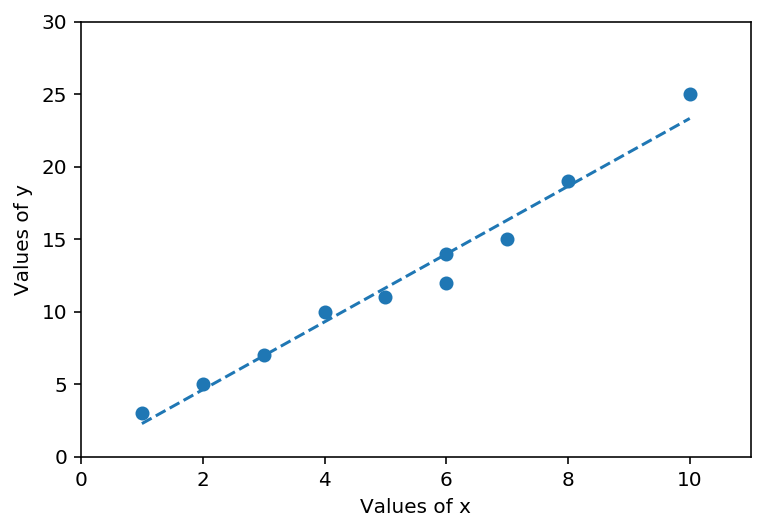

In [15]:
x = [1,2,3,4,5,6,6,7,8,10]
y = [3,5,7,10,11,12,14,15,19,25]

fit = np.polyfit(x,y,1) # x로부터 y를 예측하는 선형회귀 모델을 만든다
fit_fn = np.poly1d(fit)
plt.plot(x,y, 'yo', x, fit_fn(x), '--', color='C0')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.xlim(0,11)
plt.ylim(0,30)

In [16]:
# linregress는 LSR(Least-Squares Regression)을 사용한다
from scipy.stats import linregress
linregress(x,y)

LinregressResult(slope=2.3390804597701145, intercept=-0.06321839080459668, rvalue=0.9869995292479491, pvalue=1.2303337533696715e-07, stderr=0.13466714199576327)

# regplot()
- 산점도 그래프
- fit_reg=True/False:회귀선 표시 여부

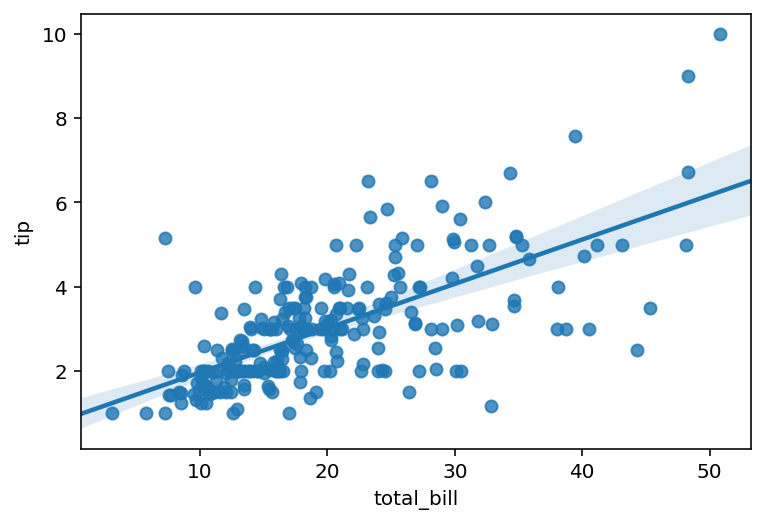

In [17]:
tips = sns.load_dataset("tips")
sns.regplot(x="total_bill", y="tip", data=tips)

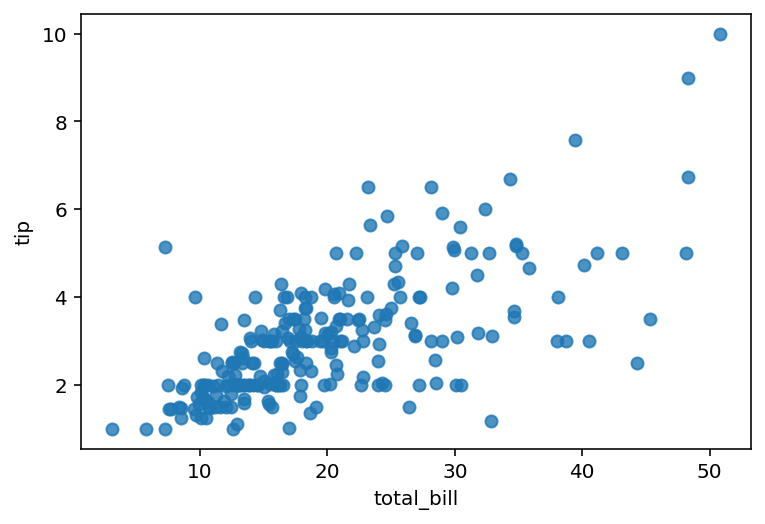

In [18]:
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)

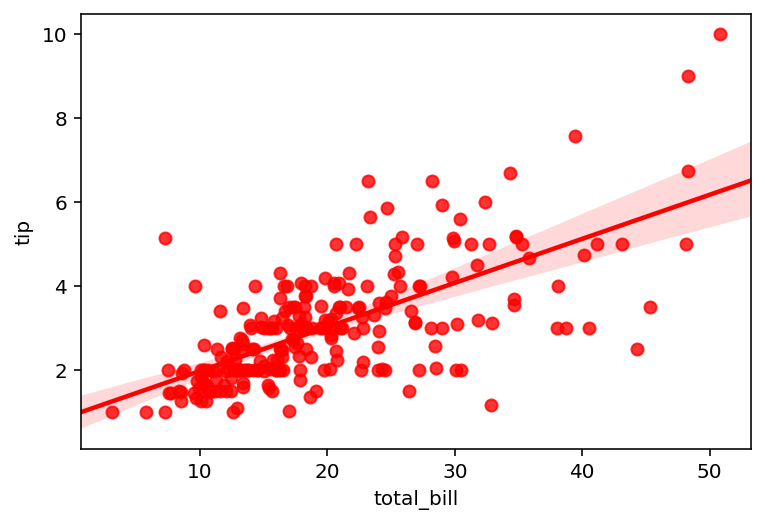

In [19]:
sns.regplot(x="total_bill", y="tip", data=tips, color='r')

# 만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용한다

## pairplot
- DataFrame을 인수로 받아 그리드(grid)형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.
- 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

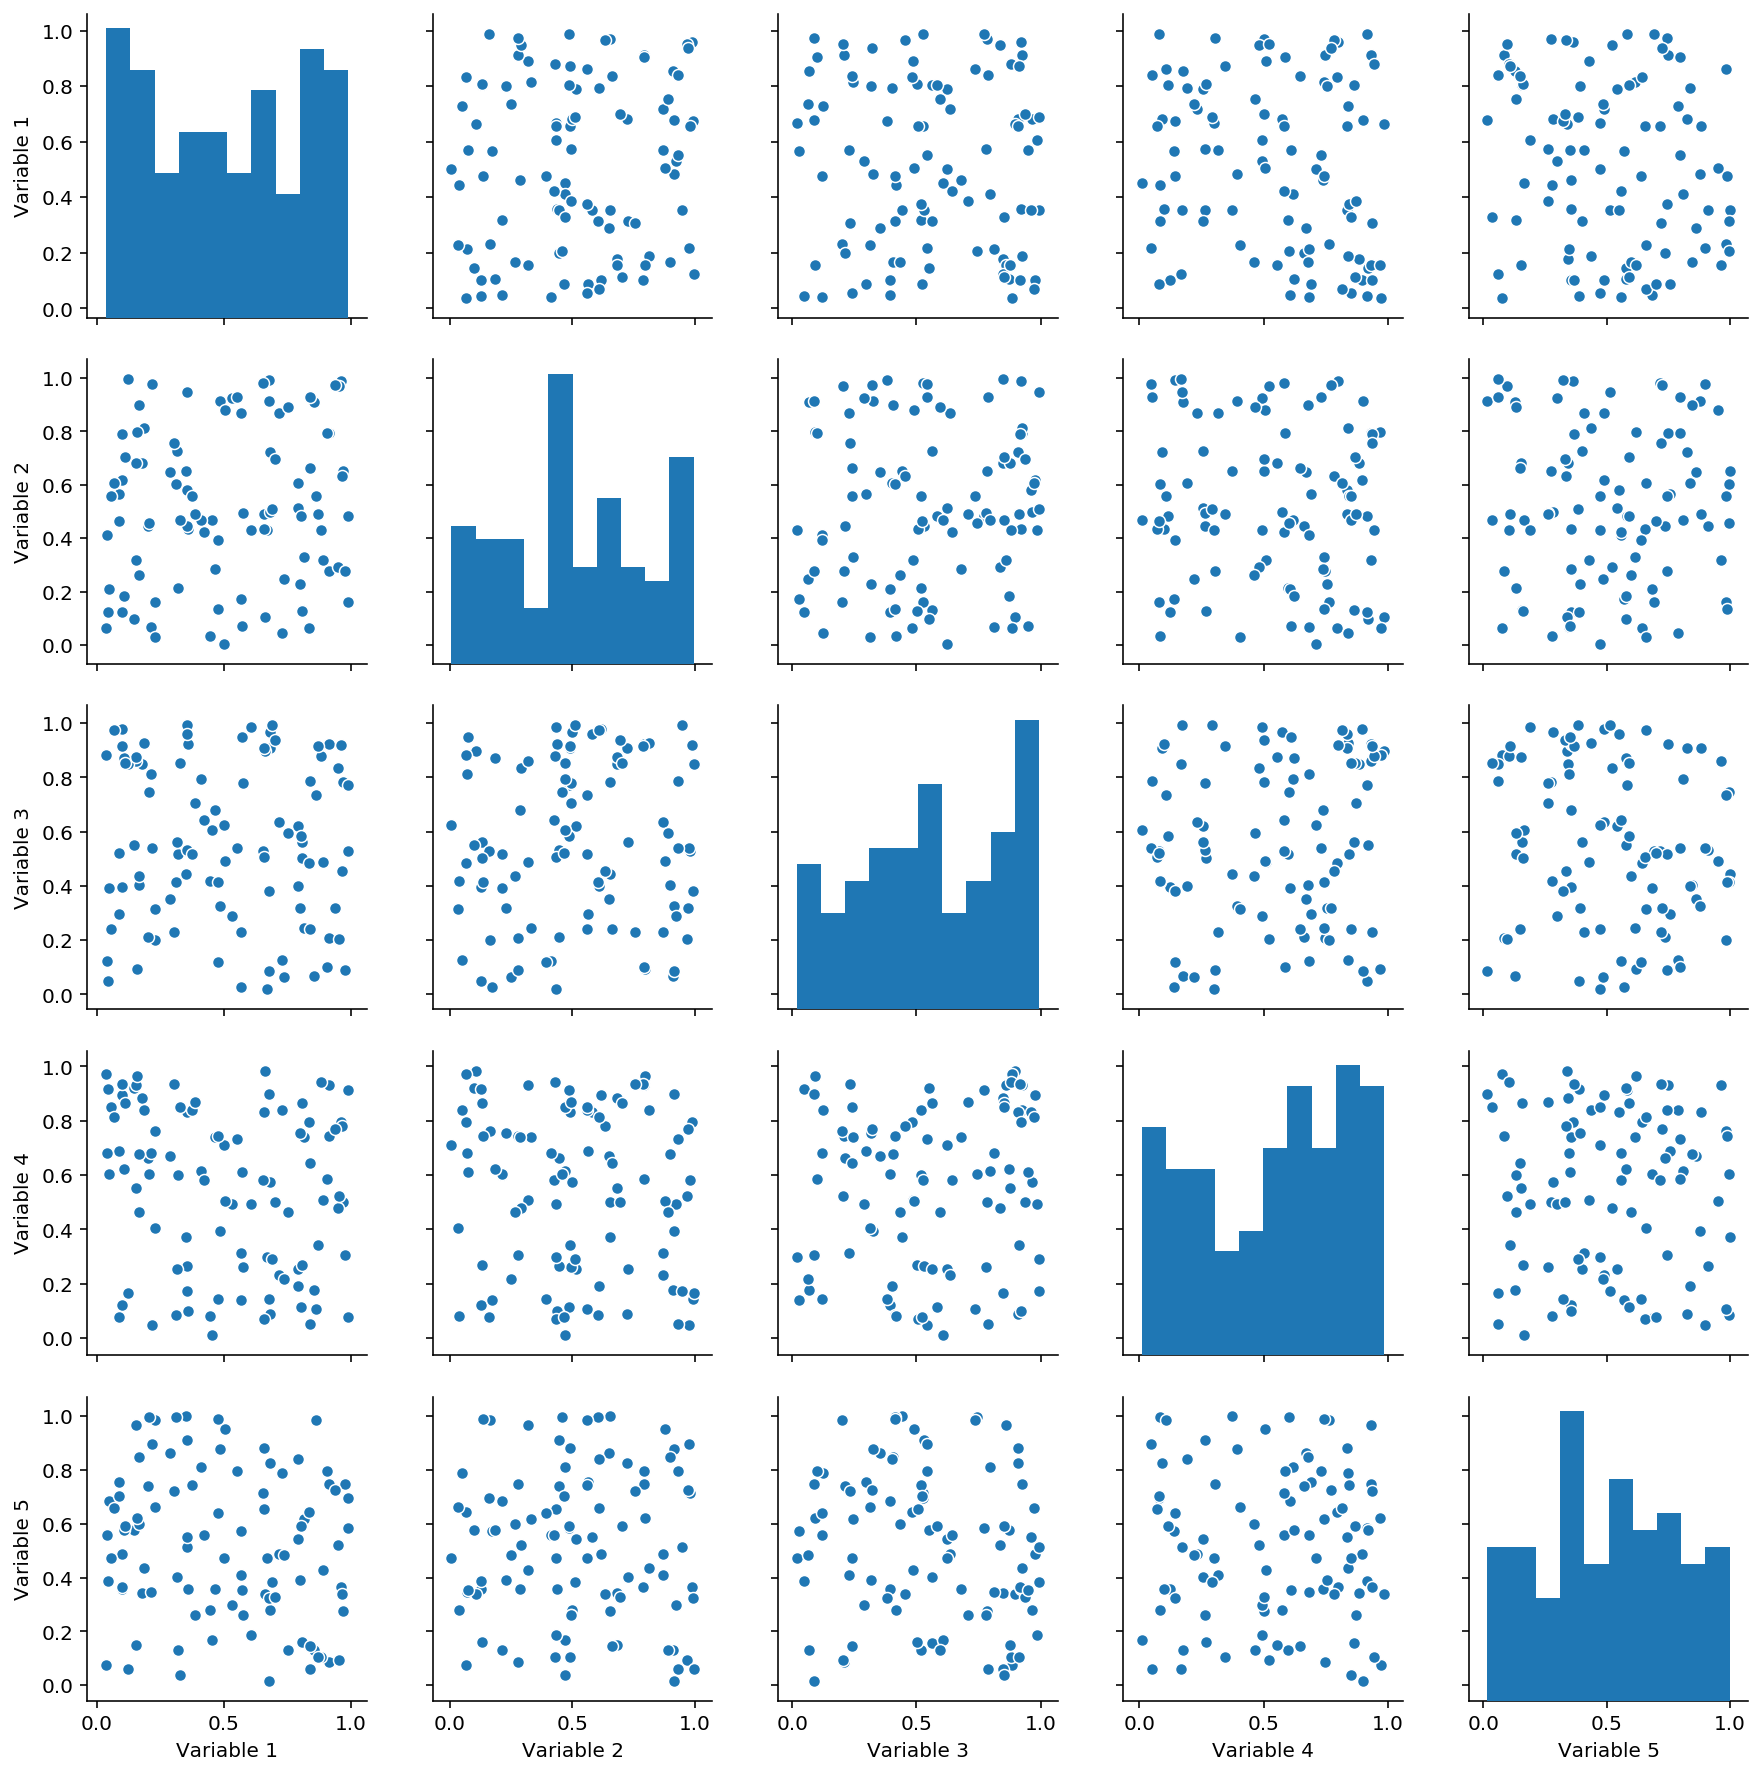

In [20]:
nobs, nvars = 100, 5
data = np.random.random((nobs, nvars))
columns = ['Variable {}'.format(i)
          for i in range(1, nvars + 1)]
df = pd.DataFrame(data, columns=columns)
sns.pairplot(df)

In [ ]:
## Generating Data:
#nobs, nvars = 100, 5
#data = np.random.random((nobs, nvars))
#columns = ['Variable {}'.format(i) for i in range(1, nvars + 1)]

##Making a pairplot:
#fig, axes = plt.subplots(ncols=nvars, nrows=nvars, sharex='col', sharey='row')
#for(i, j), ax in np.ndeunumerate